<a href="https://colab.research.google.com/github/brendanpshea/data-science/blob/main/DataScience_12_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Machine Learning: Exploring the Basics Through Storybook Characters


Machine learning is a fascinating field where we teach computers to recognize patterns, make decisions, and even predict the future based on data. At its core, machine learning involves **algorithms**—step-by-step procedures or formulas for solving problems—that learn from data. These algorithms can be compared to the way characters in storybooks like *Alice in Wonderland* or *The Wizard of Oz* navigate their worlds, learning from their experiences and making decisions based on what they encounter.

Imagine Alice in her adventures through Wonderland. She meets various characters and faces situations where she has to decide what to do next. If Alice had access to machine learning, she could use it to make more informed decisions by predicting the outcomes based on previous encounters. For example, she might have used **logistic regression** to predict whether the Cheshire Cat would appear based on the peculiarities of the environment, or a **decision tree** to decide which path to take at the fork in the road by analyzing past experiences.

In this chapter, we’ll explore six essential machine learning techniques, starting with the algorithms themselves, illustrated through simple examples using familiar characters. We'll then dive into how to implement these techniques in Python, using datasets that provide practical, hands-on experience. Finally, we'll discuss how to interpret the results of these models, ensuring that you not only know how to run them but also understand what the outcomes mean.

The techniques we’ll cover are:
1. **Logistic Regression**: For predicting categorical outcomes.
2. **k-Nearest Neighbors (k-NN)**: A simple yet powerful method for classification based on proximity.
3. **Decision Trees**: An intuitive way to make decisions by splitting data based on features.
4. **Support Vector Machines (SVM)**: A robust method for classification by finding the optimal separating boundary.
5. **Naive Bayes**: A probabilistic approach based on Bayes’ theorem, particularly effective in text classification.
6. **k-Means Clustering**: An unsupervised technique for grouping similar data points into clusters.

Each section will begin with a detailed introduction to the method, explaining the underlying algorithm in a way that’s accessible to beginners. We’ll use beloved characters from literature to bring these concepts to life, making the learning process both engaging and relatable. Afterward, we’ll walk through how to apply these methods in Python, using datasets that are readily available through the `pydataset` package. Finally, we’ll discuss how to interpret the results, with an emphasis on making sense of what the models are telling us.

By weaving together storytelling with technical knowledge, this chapter aims to make machine learning approachable and fun, while still providing the rigor needed to understand and apply these techniques effectively.

### Logistic Regression: Predicting Outcomes in Wonderland

**Introduction to Logistic Regression**:
Logistic regression is a fundamental **classification algorithm** used to predict the probability of a binary outcome—one that can take one of two possible values, such as "yes" or "no," "true" or "false." Unlike **linear regression**, which predicts a continuous value, logistic regression predicts a probability that is then mapped to a binary category.

To make this concept more tangible, let’s return to the whimsical world of *Alice in Wonderland*. Imagine that Alice is trying to predict whether the Cheshire Cat will appear when she encounters a strange smile floating in the air. Alice has observed this phenomenon several times, noting whether the smile was followed by the full appearance of the Cheshire Cat or not. She decides to use logistic regression to help make her decision.

Here's what she does:

1. **Collect Data**: Alice begins by observing various instances where a smile appears in Wonderland. She records whether the Cheshire Cat fully appears after each smile. This data will be the basis for her logistic regression model.
2. **Define the Features and Target**: The feature $x$ in this case is the presence of a smile (coded as 1 for "yes" and 0 for "no"). The target variable $y$ is whether the Cheshire Cat appears (1 for "yes," 0 for "no").
3. **Initialize Parameters**: Alice starts with an initial guess for the parameters $\beta_0$ (intercept) and $beta_1$ (coefficient for the smile feature). These parameters will be adjusted to best fit the observed data.
4. **Apply the Logistic Function**: For each observation, Alice uses the logistic function to calculate the probability that the Cheshire Cat will appear given the presence of a smile:
   $$
   P(\text{Cat appears} | \text{smile}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot \text{smile})}}
   $$

5. **Compute the Cost Function**: Alice calculates how well her model is performing by using the **cost function**, which measures the difference between the predicted probabilities and the actual outcomes. The goal is to minimize this cost.
6. **Optimize Parameters**: Using a method like **gradient descent**, Alice iteratively adjusts $\beta_0$ and $\beta_1$ to minimize the cost function. This process continues until the model is well-fitted to the data.
7. **Make Predictions**: Once the model is trained, Alice can input new data (e.g., a new instance where a smile appears) into the logistic function to predict the probability that the Cheshire Cat will appear.
8. **Classify the Outcome**: Based on the predicted probability, Alice sets a threshold (e.g., 0.5). If the probability is above this threshold, she predicts that the Cheshire Cat will appear. Otherwise, she predicts that it won’t.


### Implementing Logistic Regression in Python**
Now, let’s move from Wonderland to the world of Python. We’ll use the `pydataset` library to find a suitable dataset and implement logistic regression.

First, let's install and import the necessary libraries:

In [1]:
!pip install pydataset -q
import pandas as pd
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939416 sha256=d38e6bdedf76045f86bf3b90d5f19e3af09256f435773dbc80dff4df3c4bb1fc
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/


For this example, we’ll use the **Titanic** dataset available in pydataset. This dataset contains information about the passengers aboard the Titanic, and our goal will be to predict whether a passenger survived based on their characteristics.

In [57]:
# Load the Titanic dataset
titanic = data('titanic')

# rename class to pclass
titanic = titanic.rename(columns={'class': 'pclass'})

# Display the first few rows
titanic.head()

,pclass,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes


Next, we'll prepare the data by selecting relevant features and splitting it into training and testing sets:

In [58]:
import statsmodels.api as sm
import pandas as pd


# Define mappings for categorical variables
mappings = {
    '1st class': 1, '2nd class': 2, '3rd class': 3,
    'adults': 1, 'children': 0,
    'man': 1, 'woman': 0,
    'yes': 1, 'no': 0
}

# Apply the mapping to relevant columns
df = titanic.replace(mappings)

# Fit the logistic regression model using the formula
model = sm.Logit.from_formula('survived ~ pclass + age + sex', data=df)
result = model.fit()

# Print the model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.485107
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                 1316
Model:                          Logit   Df Residuals:                     1312
Method:                           MLE   Df Model:                            3
Date:                Tue, 03 Sep 2024   Pseudo R-squ.:                  0.2690
Time:                        21:05:29   Log-Likelihood:                -638.40
converged:                       True   LL-Null:                       -873.38
Covariance Type:            nonrobust   LLR p-value:                1.548e-101
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4718      0.194      2.433      0.015       0.092       0.852
age[T.child]     1.0562

### Interpreting Logistic Regression Output

When you run a logistic regression, the output can seem complex, but focusing on a few key elements helps you understand what the model is telling you. Here's how to interpret the most important parts of the output:

#### Model Fit Information
   - **Log-Likelihood**: `-638.40`
     - This is a measure of how well the model fits the data. A higher (less negative) log-likelihood indicates a better fit. However, it’s not interpreted directly; it’s mainly used for comparing models.
   - **Pseudo R-squared**: `0.2690`
     - This is a version of the R-squared used in linear regression, but for logistic regression. It indicates how much of the variation in the dependent variable (`survived`) is explained by the model. Here, about 26.9% of the variation is explained, which is decent for a logistic regression model.
   - **LLR p-value**: `1.548e-101`
     - This p-value tests the null hypothesis that all coefficients are equal to zero (i.e., the model has no predictive power). A very small p-value (like this one) indicates that the model as a whole is statistically significant.

#### Coefficients (coef)
   - **Intercept**: `0.4718`
     - This is the baseline log-odds of the outcome (`survived = 1`) when all other predictors are zero. It’s not usually the main focus of interpretation but is part of the model.
   - **age[T.child]**: `1.0562`
     - This indicates the log-odds of survival increase by about 1.0562 when the person is a child, compared to being an adult, holding all other variables constant.
   - **sex[T.women]**: `2.3673`
     - The log-odds of survival increase by 2.3673 for women compared to men, holding all other variables constant.
   - **pclass**: `-0.8748`
     - The log-odds of survival decrease by 0.8748 for each one-unit increase in passenger class (where a higher number indicates a lower class). In other words, people in higher (worse) classes were less likely to survive.

#### Standard Errors (std err)
   - The standard errors give you an idea of the uncertainty around the coefficient estimates. Smaller standard errors indicate more precise estimates.

#### Z-values and P-values
   - **Z-values**: These tell you how many standard deviations the coefficient is from zero. Higher absolute values suggest that the predictor is important in the model.
   - **P>|z|**: These are p-values for each coefficient, testing the null hypothesis that the coefficient is zero (no effect). Small p-values (typically less than 0.05) suggest that the predictor is statistically significant.
     - **age[T.child]**: p-value = `0.000`
     - **sex[T.women]**: p-value = `0.000`
     - **pclass**: p-value = `0.000`
     - All these predictors are highly significant, meaning they have a strong association with survival.

#### Confidence Intervals ([0.025, 0.975])
   - These show the range within which the true coefficient value lies with 95% confidence.
   - For instance, the true effect of being a woman on survival likely lies between 2.083 and 2.652 in log-odds.

#### Key Takeaways
-  Being a child, being a woman, and being in a higher class (1st vs. 2nd vs. 3rd) all significantly influence the likelihood of survival.
-  Positive coefficients (like for `age[T.child]` and `sex[T.women]`) indicate increased odds of survival, while negative coefficients (like for `pclass`) indicate decreased odds.
- The model is statistically significant, meaning it provides a meaningful prediction of survival based on the predictors.

This output tells a story: children and women were more likely to survive the Titanic disaster, while those in lower classes were less likely to survive. This kind of interpretation is crucial for understanding the implications of the model's findings.

## k-Nearest Neighbors (k-NN): Finding Friends in Oz

**Introduction to k-Nearest Neighbors (k-NN)**: The **k-Nearest Neighbors (k-NN)** algorithm is one of the simplest yet most effective techniques in machine learning. It's a **non-parametric** method, meaning it doesn't make any assumptions about the underlying data distribution. Instead, it relies on the idea that similar things exist in close proximity to each other. In the context of classification, this means that a data point is classified based on the majority class of its nearest neighbors.

To illustrate, let's take a trip down the yellow brick road with Dorothy in *The Wizard of Oz*. Imagine Dorothy is trying to decide whether a mysterious figure she sees in the distance is a friend or a foe. She knows that friendly characters, like the Scarecrow, Tin Man, and Cowardly Lion, all have certain characteristics---maybe they're tall, have a warm demeanor, or carry specific objects. On the other hand, foes, like the Wicked Witch, have different characteristics. Dorothy can use the k-NN algorithm to make this decision. She'll compare the unknown figure to her known friends and foes, considering the closest ones to her. If most of her nearest neighbors are friendly, she'll decide that the figure is likely a friend.

The core idea of k-NN is **distance**---typically measured using **Euclidean distance** in a multidimensional space. The algorithm calculates the distance between the data point in question and all other points in the dataset. It then selects the *k* closest points (neighbors) and assigns the class that is most common among these neighbors to the new data point.

For example, if Dorothy sees a figure in the distance and compares it to the characteristics of her known friends and foes, k-NN might help her determine that the figure is, indeed, another friend coming to join her on the journey. The process is something like this:

1. **Collect Data**. Dorothy has a list of friends and foes she’s encountered along her journey. For each, she records characteristics such as height, demeanor, and whether they carry specific objects (e.g., a lion’s mane, a tin suit). Each character is labeled as either "friend" or "foe."
2. **Define Features and Labels**. The features are the characteristics Dorothy has recorded (e.g., height, demeanor). The label is whether the character is a "friend" or "foe."
3. **Choose a Value for $k$.** Dorothy must decide how many neighbors to consider when making her classification. In this case, she chooses $k = 3$, meaning she’ll look at the three closest characters to the unknown figure.
4. **Calculate Distance**. Dorothy measures the **Euclidean distance** between the unknown figure and each of her known friends and foes based on their features. For example, if the figure is tall and carries an axe, Dorothy calculates the distance between these traits and those of the Scarecrow, Tin Man, and Cowardly Lion.
5. **Find the k Nearest Neighbors**. Dorothy selects the three closest characters (based on the calculated distances). These are the ones most similar to the unknown figure.
6. **Vote on the Class**. Among the three nearest neighbors, Dorothy sees how many are labeled as "friend" and how many as "foe." She then assigns the majority label to the unknown figure. If two out of three nearest neighbors are friends, she classifies the unknown figure as a friend.
7. **Classify the Outcome**. The unknown figure is classified based on the majority vote of its nearest neighbors. Dorothy now knows whether the figure is likely to be a friend or a foe based on this simple yet effective approach.
8. **Optional: Adjust $k$**: If Dorothy’s initial choice of $k = 3$ doesn’t seem to work well (e.g., she misclassifies a figure), she can experiment with different values of $k$ to improve the model’s accuracy.

These step-by-step breakdowns show how the algorithms work in their respective fictional contexts, making the abstract concepts more relatable and easier to grasp for students.

### Implementing k-Nearest Neighbors in Python
To implement k-NN in Python, let's use the Wine dataset from sklearn.datasets. This dataset contains chemical analysis results of wines grown in the same region in Italy but derived from three different cultivars. It includes 13 features, which makes it a bit more complex and interesting for k-nnn. Our goal is to figure out which "cultivar" each wine came from based on its characterists.

The Iris dataset consists of four features: sepal length, sepal width, petal length, and petal width, and the target variable is the species of the iris flower.

Next, we’ll prepare the data and implement the k-NN algorithm

In [78]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='Cultivar')

# concatenate and display X and y
pd.concat([X, y], axis=1).head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Cultivar
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Accuracy: 0.74
Confusion Matrix:
[[17  0  2]
 [ 1 15  5]
 [ 1  5  8]]
Classification Report:
              precision    recall  f1-score   support

     class_0       0.89      0.89      0.89        19
     class_1       0.75      0.71      0.73        21
     class_2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



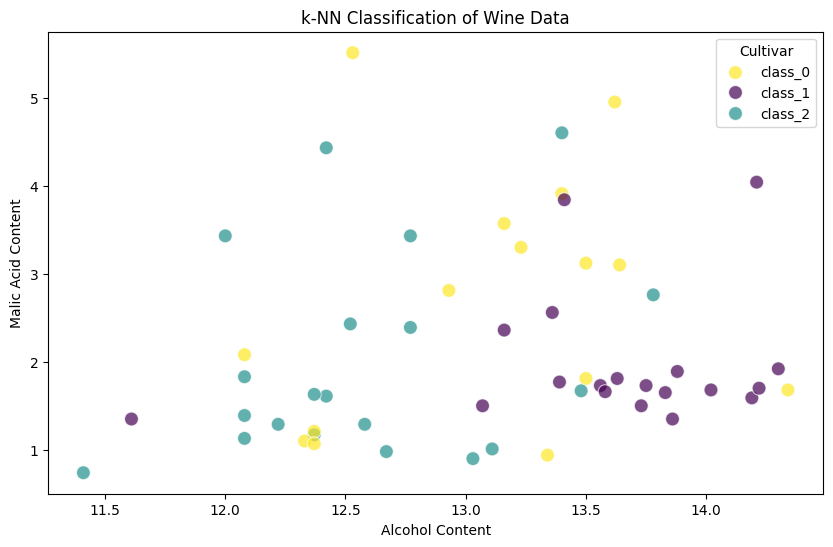

In [73]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the k-NN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict the test set results
y_pred = knn.predict(X_test)

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Print the classification report
class_report = classification_report(y_test, y_pred, target_names=wine.target_names)
print('Classification Report:')
print(class_report)

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='malic_acid', hue=y_pred, palette='viridis', data=X_test, s=100, alpha=0.7)
plt.title('k-NN Classification of Wine Data')
plt.xlabel('Alcohol Content')
plt.ylabel('Malic Acid Content')
plt.legend(title='Cultivar', loc='upper right', labels=wine.target_names)
plt.show()

### Interpreting K-Nearest Neighbors
Here's how to interpret K-Nearest Neighbords.

The **accuracy** of the model is 74%, which means that out of all the predictions made by the model, 74% were correct. While this isn’t perfect, it indicates that the model is doing fairly well, though there’s room for improvement.

The **confusion matrix** is a table that shows how many actual instances in each class were correctly or incorrectly classified by the model.

```
[[17  0  2]
 [ 1 15  5]
 [ 1  5  8]]
```

- **Rows**: Each row of the matrix represents the true class.
- **Columns**: Each column represents the predicted class.

Let’s break down each row:

- **Row 1 (Class 0 - actual class)**:
  - 17 instances were correctly predicted as class 0 (top-left cell).
  - 0 instances were incorrectly predicted as class 1 (top-middle cell).
  - 2 instances were incorrectly predicted as class 2 (top-right cell).

- **Row 2 (Class 1 - actual class)**:
  - 1 instance was incorrectly predicted as class 0 (middle-left cell).
  - 15 instances were correctly predicted as class 1 (middle cell).
  - 5 instances were incorrectly predicted as class 2 (middle-right cell).

- **Row 3 (Class 2 - actual class)**:
  - 1 instance was incorrectly predicted as class 0 (bottom-left cell).
  - 5 instances were incorrectly predicted as class 1 (bottom-middle cell).
  - 8 instances were correctly predicted as class 2 (bottom-right cell).

### Classification Report
This report provides more detailed metrics for each class.

**Precision** is the percentage of correct positive predictions made for a class out of all the predictions made for that class. It answers the question: *When the model predicts a certain class, how often is it correct?*
  
  - **Class 0**: 0.89 (89% of the time, when the model predicts class 0, it’s correct)
  - **Class 1**: 0.75 (75% of the time, when the model predicts class 1, it’s correct)
  - **Class 2**: 0.53 (53% of the time, when the model predicts class 2, it’s correct)

**Recall** (or **sensitivity**) is the percentage of actual positives that were correctly identified by the model. It answers the question: *Of all the actual instances of a class, how many did the model correctly identify?*
  
  - **Class 0**: 0.89 (The model correctly identifies 89% of the actual class 0 instances)
  - **Class 1**: 0.71 (The model correctly identifies 71% of the actual class 1 instances)
  - **Class 2**: 0.57 (The model correctly identifies 57% of the actual class 2 instances)

The **F1-score** is the harmonic mean of precision and recall, providing a balance between the two. It’s particularly useful when you want to balance precision and recall.

  - **Class 0**: 0.89
  - **Class 1**: 0.73
  - **Class 2**: 0.55

**Support** is the number of actual instances for each class in the test set.

  - **Class 0**: 19
  - **Class 1**: 21
  - **Class 2**: 14

### Summary
- **Class 0**: The model is performing very well for class 0, with high precision, recall, and F1-score. Most predictions for class 0 are correct.
- **Class 1**: The model is doing reasonably well for class 1 but with some room for improvement, particularly in recall (it’s missing some actual instances of class 1).
- **Class 2**: The model struggles the most with class 2, as indicated by lower precision and recall. This could be due to fewer instances of class 2 in the dataset (only 14), making it harder for the model to learn this class well.

Overall, the model has an overall accuracy of 74%, which is decent but not perfect. It does very well with class 0 and reasonably well with class 1 but has more difficulty with class 2. These results suggest that the model might benefit from further tuning, additional data, or a different classification algorithm that better handles the nuances of the data.